<a href="https://colab.research.google.com/github/Dharanidharan457/ShadowFox/blob/main/intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conduct an in-depth analysis of the Air Quality Index (AQI) in
Delhi, addressing the specific environmental challenges faced by the
city. Define research questions centered around key pollutants,
seasonal variations, and the impact of geographical factors on air
quality. Utilize statistical analyses and visualizations to gain insights
into the dynamics of AQI in Delhi, offering a comprehensive
understanding that can inform targeted strategies for air quality
improvement and public health initiatives in the region.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#Load Data
df = pd.read_csv('/content/delhiaqi.csv')
df['date'] = pd.to_datetime(df['date'])

#Data Cleaning
df = df.dropna(subset=['pm2_5', 'pm10', 'co', 'no2', 'so2', 'o3'])



In [3]:

# AQI Calculation
def calculate_aqi(sub_index, pollutant):
    breakpoints = {
        'pm2_5': [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200),
                  (91, 120, 201, 300), (121, 250, 301, 400), (251, 500, 401, 500)],
        'pm10': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200),
                 (251, 350, 201, 300), (351, 430, 301, 400), (431, 600, 401, 500)],

    }

    for bp in breakpoints.get(pollutant, []):
        if bp[0] <= sub_index <= bp[1]:
            return ((bp[3] - bp[2]) / (bp[1] - bp[0])) * (sub_index - bp[0]) + bp[2]
    return np.nan


df['aqi_pm2_5'] = df['pm2_5'].apply(lambda x: calculate_aqi(x, 'pm2_5'))
df['aqi_pm10'] = df['pm10'].apply(lambda x: calculate_aqi(x, 'pm10'))
df['aqi'] = df[['aqi_pm2_5', 'aqi_pm10']].max(axis=1)



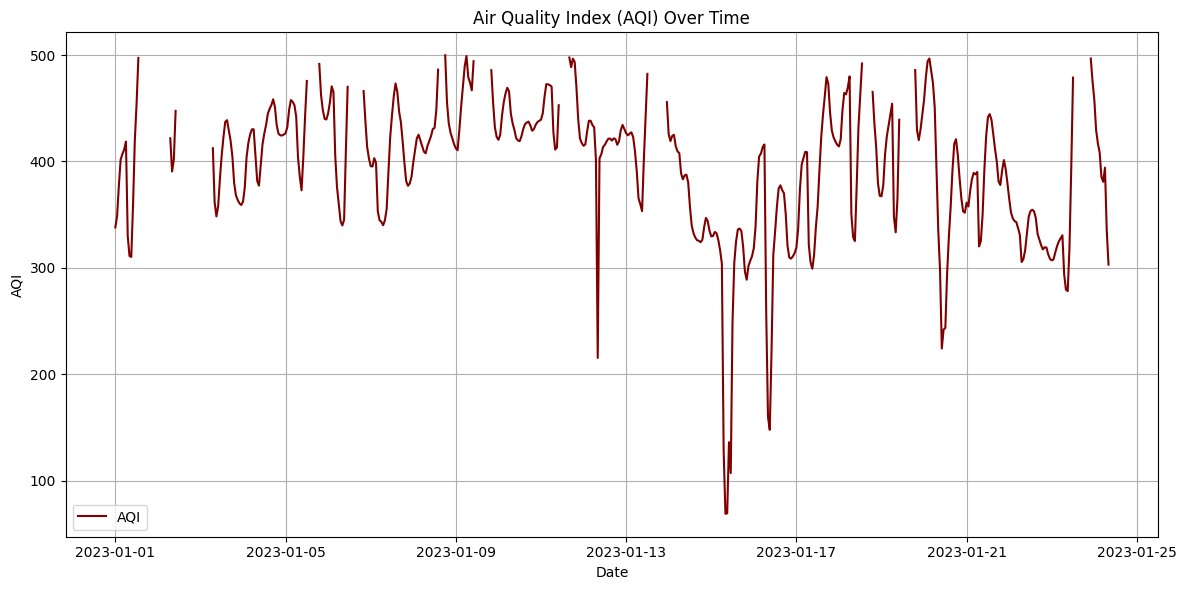

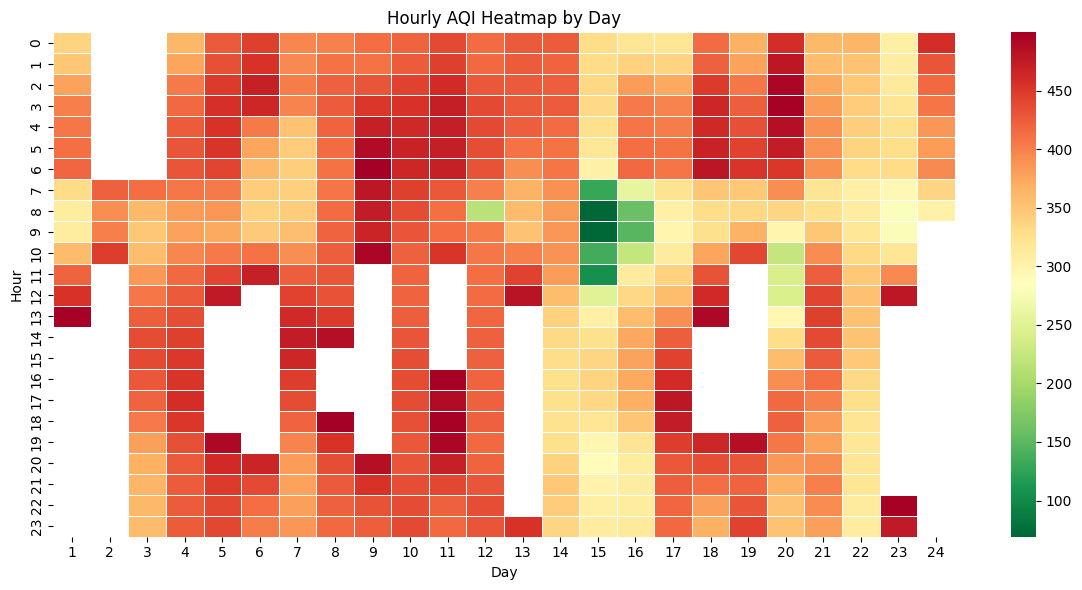

In [11]:

#Visualizations
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['aqi'], label='AQI', color='maroon')
plt.title('Air Quality Index (AQI) Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Heatmap
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
pivot_table = df.pivot_table(values='aqi', index='hour', columns='day')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='RdYlGn_r', linewidths=0.5, linecolor='white')
plt.title('Hourly AQI Heatmap by Day')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()



In [12]:


#Benchmark Assessment
def categorize_aqi(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Satisfactory'
    elif aqi <= 200: return 'Moderate'
    elif aqi <= 300: return 'Poor'
    elif aqi <= 400: return 'Very Poor'
    else: return 'Severe'

df['aqi_category'] = df['aqi'].apply(categorize_aqi)
print(df['aqi_category'].value_counts())

aqi_category
Severe          356
Very Poor       183
Poor             15
Moderate          5
Satisfactory      2
Name: count, dtype: int64
